In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torch import nn

In [2]:
## making dataset


n_samples = 1500
n_features = 2

# n_samples = number of samples
# n_features = The number of features for each sample.
# centers = No of classes
# cluster_std = standard devation in clusater
blobs = make_blobs(n_samples=n_samples, n_features=n_features, centers=4, random_state=15)

In [3]:
X, y = blobs

In [4]:
# X, y

In [5]:
X.shape, y.shape

((1500, 2), (1500,))

In [6]:
y[:10]

array([2, 3, 2, 2, 3, 3, 0, 1, 0, 0])

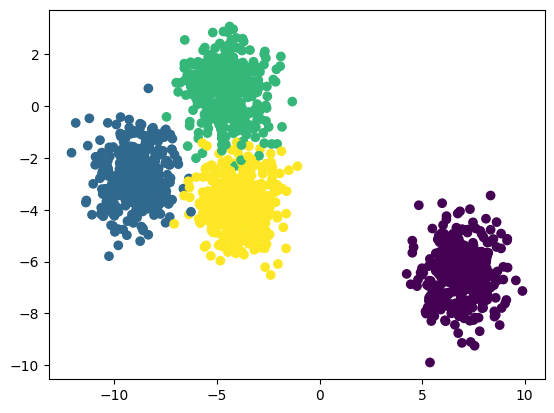

In [7]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)

In [8]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=545, test_size=0.25)

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
X_tr = torch.from_numpy(X_tr).type(torch.float).to(device)
X_te = torch.from_numpy(X_te).type(torch.float).to(device)
y_tr = torch.from_numpy(y_tr).type(torch.long).to(device)
y_te = torch.from_numpy(y_te).type(torch.long).to(device)

In [11]:
class blob_clasif(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(in_features=2, out_features=8)
        self.l2 = nn.Linear(in_features=8, out_features=8)        
        self.l3 = nn.Linear(in_features=8, out_features=8)        
        self.l4 = nn.Linear(in_features=8, out_features=4)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()
        self.tanh = nn.Tanh()
        self.lk_relu = nn.LeakyReLU()
    
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.relu(x)
        x = self.l3(x)        
        x = self.relu(x)
        x = self.l4(x)
        x = self.lk_relu(x)
        return x

In [12]:
blob_model = blob_clasif()

In [13]:
blob_model.to(device)

blob_clasif(
  (l1): Linear(in_features=2, out_features=8, bias=True)
  (l2): Linear(in_features=8, out_features=8, bias=True)
  (l3): Linear(in_features=8, out_features=8, bias=True)
  (l4): Linear(in_features=8, out_features=4, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=None)
  (tanh): Tanh()
  (lk_relu): LeakyReLU(negative_slope=0.01)
)

In [14]:
loss_fn = nn.CrossEntropyLoss() # softmax is already applied in this
optim_fn = torch.optim.Adam(params=blob_model.parameters(), lr=0.05 )

In [15]:
loss_fn, optim_fn

(CrossEntropyLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.05
     maximize: False
     weight_decay: 0
 ))

In [16]:
# training loop

epoch = 1000
for e in range(epoch):
    blob_model.train()
    y_preds = blob_model(X_tr)
    loss = loss_fn(y_preds, y_tr)
    optim_fn.zero_grad()
    loss.backward()
    optim_fn.step()
    blob_model.eval()
    
    if e%(epoch//10) == 0:
        with torch.inference_mode():
            print(f"Epoch: {e}, loss {loss.cpu().detach().numpy()}")

Epoch: 0, loss 1.3930673599243164
Epoch: 100, loss 0.024208102375268936
Epoch: 200, loss 0.022823229432106018
Epoch: 300, loss 0.02191135846078396
Epoch: 400, loss 0.021889207884669304
Epoch: 500, loss 0.021352138370275497
Epoch: 600, loss 0.021166615188121796
Epoch: 700, loss 0.023605402559041977
Epoch: 800, loss 0.02052714116871357
Epoch: 900, loss 0.021211842074990273


In [17]:
y_preds = blob_model(X_te).cpu().detach().numpy()

In [18]:
y_preds

array([[-4.5877472e-02, -3.1144339e-01,  3.4709145e+01, -4.3729637e-03],
       [-5.4671593e-02, -4.3177399e-01,  4.5733837e+01, -3.8294099e-02],
       [ 8.9743996e+01, -2.1402266e+00,  7.1341263e+01,  6.4931892e+01],
       ...,
       [-1.1708926e-01,  2.8685303e+01,  9.1334963e+00,  2.1744996e-01],
       [ 9.4566488e+00, -5.6976225e-02, -1.8107859e-02,  2.9118668e+01],
       [ 8.0605286e+01, -1.8462701e+00,  5.8792221e+01,  6.5579811e+01]],
      dtype=float32)

In [19]:
import numpy as np
y_pd=[]
for i in blob_model(X_te):
    y_pd.append(torch.argmax(i.cpu().detach()))
y_pd = np.array(y_pd)

In [20]:
y_te

tensor([2, 2, 0, 1, 0, 0, 0, 3, 3, 3, 1, 0, 3, 3, 1, 0, 2, 0, 3, 2, 0, 2, 0, 1,
        1, 3, 1, 2, 1, 3, 0, 0, 3, 0, 2, 3, 1, 1, 0, 1, 2, 2, 0, 1, 0, 3, 1, 2,
        0, 0, 1, 0, 1, 0, 2, 3, 1, 2, 2, 1, 3, 3, 0, 0, 1, 1, 0, 0, 2, 1, 3, 2,
        2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 3, 1, 0, 0, 1, 1, 2, 1,
        3, 2, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2,
        1, 1, 2, 0, 3, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 3, 0, 2, 0, 0, 1, 2, 1,
        2, 2, 1, 3, 0, 0, 1, 1, 2, 0, 3, 3, 0, 1, 2, 0, 0, 2, 2, 0, 2, 1, 1, 0,
        3, 3, 1, 2, 1, 2, 0, 3, 1, 3, 2, 2, 1, 1, 1, 3, 0, 3, 3, 3, 2, 2, 3, 3,
        2, 2, 2, 2, 3, 0, 3, 3, 0, 1, 0, 1, 0, 0, 1, 0, 3, 0, 0, 0, 3, 0, 0, 2,
        1, 2, 0, 2, 0, 3, 3, 2, 1, 1, 3, 2, 3, 0, 3, 1, 1, 3, 1, 2, 2, 3, 0, 1,
        1, 2, 0, 0, 0, 3, 1, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 3, 2, 2, 0, 3,
        1, 0, 0, 1, 1, 3, 0, 2, 2, 2, 3, 3, 1, 3, 3, 2, 3, 2, 3, 0, 0, 0, 3, 1,
        2, 0, 0, 1, 1, 1, 1, 3, 1, 3, 3,

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_te.cpu().detach(), y_pd)

0.984

## classificatin metrics
* Precision
* Recall
* F1-score
* confussion matrix
* classification report

In [22]:
# precision
from sklearn.metrics import precision_score
import torchmetrics as tm

ModuleNotFoundError: No module named 'torchmetrics'

In [23]:
print(precision_score(y_te.cpu().detach(), y_pd, average='weighted')) 

# tm_pre = tm.Precision(task='multiclass', average='macro', num_classes=4)
# tm_pre(y_te.cpu().detach(), y_pd)

0.9839860574372964


In [24]:
#recall
from sklearn.metrics import recall_score


In [25]:
recall_score(y_te.cpu().detach(), y_pd, average='weighted')

0.984

In [26]:
# f1
from sklearn.metrics import f1_score

In [27]:
f1_score(y_te.cpu().detach(), y_pd, average='weighted')

0.983979037186291

In [28]:
# confusion matrics

from sklearn.metrics import confusion_matrix
confusion_matrix(y_te.cpu().detach(), y_pd)

array([[101,   0,   0,   0],
       [  0, 104,   1,   0],
       [  0,   0,  83,   2],
       [  0,   2,   1,  81]])

In [29]:
# classificaton report

from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_te.cpu().detach(), y_pd,  target_names=['c1', 'c2', 'c3', 'c4']))

              precision    recall  f1-score   support

          c1       1.00      1.00      1.00       101
          c2       0.98      0.99      0.99       105
          c3       0.98      0.98      0.98        85
          c4       0.98      0.96      0.97        84

    accuracy                           0.98       375
   macro avg       0.98      0.98      0.98       375
weighted avg       0.98      0.98      0.98       375

